# Part 1: Some Pandas Tutorials to Run Through

#### Charting in Colaboratory
https://colab.research.google.com/drive/1jXsIJXQ27sV0XCdbofxKE_T3VnODIvST?usp=sharing

In this section, I learnt about the different types of visualisations I could create using matplotlib. This would prove useful in our assignment 2: Personal Informatics, given that we will need to visualise and identify trends in the step data. The selection of an appropriate visualisation is key to communicating across any insights. Following this exercise, I have identified line graphs, bar plots, seaborn plot and subplotting as tools we can use. 

#### Intro to Pandas
https://colab.research.google.com/drive/1yY2MM6Cgi217CDJMtBajzGYIORTqtPhC?usp=sharing

In this section, I learnt about Pandas and how to create a data frame, access and manipulate data. In the context of the data provided for assignment 2, I will use df.describe() to observe some interesting statistics.

# Part 2: Hurdle Task for Assignment 2 : Checkpoint for individual data exploration to gain understanding.

#### Expoloratory Analysis of Dataset 1: User 2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt

Initialise the dataset

In [9]:
df = pd.read_csv('User2.csv')
df['Steps (count)'] = df['Steps (count)'].round().astype(int)
df = df.rename(columns={'Start': 'Start', 'Finish': 'Finish', 'Steps (count)': 'Hourly Steps Count'})
df

,Start,Finish,Hourly Steps Count
0,29-Nov-2014 00:00,29-Nov-2014 01:00,503
1,29-Nov-2014 01:00,29-Nov-2014 02:00,503
2,29-Nov-2014 02:00,29-Nov-2014 03:00,503
3,29-Nov-2014 03:00,29-Nov-2014 04:00,503
4,29-Nov-2014 04:00,29-Nov-2014 05:00,503
...,...,...,...
42272,25-Sep-2019 07:00,25-Sep-2019 08:00,0
42273,25-Sep-2019 08:00,25-Sep-2019 09:00,0
42274,25-Sep-2019 09:00,25-Sep-2019 10:00,31
42275,25-Sep-2019 10:00,25-Sep-2019 11:00,418


We notice that there are some data which repeat the same hourly step count at very odd times. For example, in rows 0 to 4, the step count remains the same. This could be a hardware error, but a greater dive into the metadata can help provide answers. 

To determine if any null values are inside dataset. From below, we can conclude we have none

In [10]:
df.isnull().sum()
# No Null Values in dataset

Start                 0
Finish                0
Hourly Steps Count    0
dtype: int64

Observation of interesting insights:
- 42277 rows of data
- Average step count is 416 steps per hour
- Standard Deviation is 726 steps per hour
- Range of steps per hour goes from 0 to 7261, with 50% of data lying above 177

The rationale of this section is to see if there are anything of interest that I should take note of.

In [11]:
df.describe().round(2)

,Hourly Steps Count
count,42277.00
mean,415.86
std,726.06
min,0.00
25%,0.00
50%,178.00
75%,479.00
max,7262.00


The data is right-skewed, and as shown below, heavily favours days and hourly times where there is no activity. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0451d3e978>]],
      dtype=object)

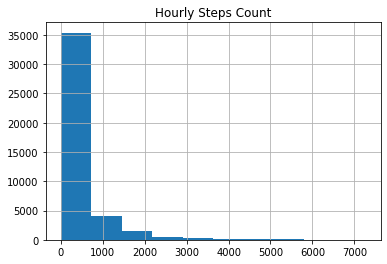

In [12]:
df.hist('Hourly Steps Count')

There are many outliers in the data, as shown below:

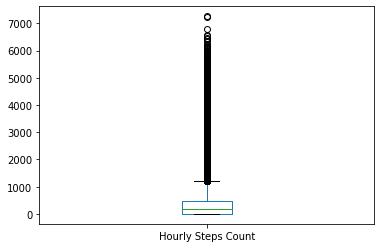

In [13]:
df['Hourly Steps Count'].plot.box()

Finding proportion of steps per hour

The aim of this section is to see how 'frequently' User 2 walked around. This would allow us to determine if they are an active/in-active individual.

In [ ]:
df1 = df.groupby(by='Hourly Steps Count', as_index=False).agg({'Start': pd.Series.nunique})
df1 = df1.rename(columns={'Hourly Steps Count': 'Number of Steps Per Hour', 'Start': 'Count'})
df1['Proportion of Steps per Hour'] = (df1['Count']/len(df.index))

A visualisation of the above table, it can be seen that the data is extremely concentrated to zero steps. This is a problem, especially if we want to determine how active they are.

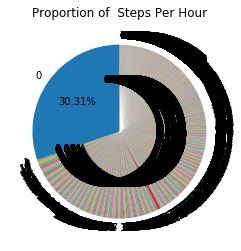

In [ ]:
plt.pie(df1['Proportion of Steps per Hour'], labels=df1['Number of Steps Per Hour'],
        startangle=90,
        autopct = '%1.2f%%')
plt.title('Proportion of  Steps Per Hour')
plt.show()

From the cumulative histogram, we can see that there is a greater number of 0-2000 steps per hour for this user. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05C7AB748>]],
      dtype=object)

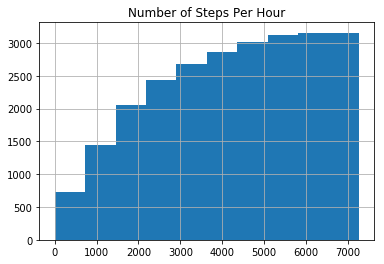

In [ ]:
df1.hist('Number of Steps Per Hour', cumulative=True)

To observe their active hourly step data per day, we remove any rows containing zero steps.

In [ ]:
active_days = pd.DataFrame()
active_days = df[(df != 0).all(1)]
active_days = active_days.reset_index()

Below are some descriptive statistics

In [ ]:
active_days.describe().round(2)

,index,Hourly Steps Count
count,29460.00,29460.00
mean,20751.01,596.78
std,12424.59,805.32
min,0.00,1.00
25%,9634.75,157.00
50%,20957.50,318.00
75%,31559.25,685.00
max,42276.00,7262.00


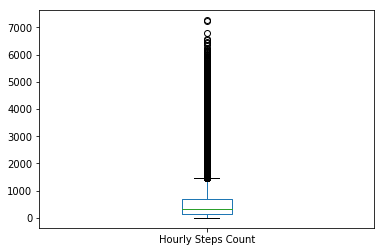

In [ ]:
active_days['Hourly Steps Count'].plot.box()

Examining our datetime data, we have created a new dataframe that contains daily step count data. Our purpose is to determine what would be considered a reasonable amount of daily steps per day for this User, and minimise the impacts of outliers. By creating a seperate dataframe that can allow us to exclude outliers, this would help us provide a more statistically sound insight into the driving question of calculating step counts within a 10 hr period.

In [ ]:
# convert object type into date-time format for further calculations
df2 = pd.DataFrame()
df2['Date'] = pd.to_datetime(df['Start'], dayfirst = True)
df2['Date'] = df2['Date'].dt.normalize()
df2['Steps (count)'] = df['Hourly Steps Count'] 
vals = df2.groupby(['Date'])[['Steps (count)']].agg('sum')
vals = vals.rename(columns={'Date': 'Date', 'Steps (count)': 'Daily Steps Count'})

A graphical visualisation of daily step count

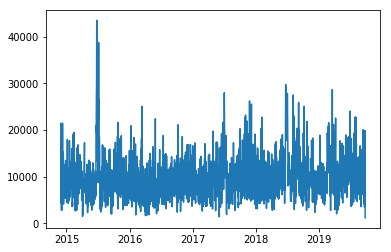

In [ ]:
plt.plot(vals)

Observation of interesting insights:
- 1762 days of daily step count data
- Average daily step count is 9972 steps
- Standard Deviation per day is 4767 steps
- Range of steps per day goes from 0 to 43502, with 50% of data lying between 5617 and 12528 steps.

In [ ]:
vals.describe().round(2)

,Daily Steps Count
count,1762.00
mean,9977.96
std,4768.27
min,1175.00
25%,6523.75
50%,9444.50
75%,12537.25
max,43509.00


From the data, we can see that there is a slight normal distribution occuring (if we ingore the outliers). What this means is that this indivudal may have days in which they work extremely hard, and days where they like to be lazy. Finding these time periods, and if any, trends, would help in generating our methodology.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E05277C7F0>]],
      dtype=object)

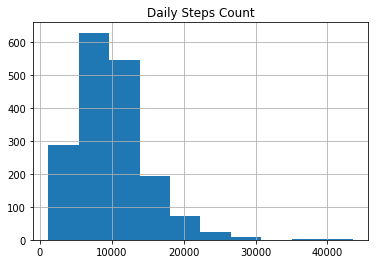

In [ ]:
vals.hist('Daily Steps Count')